# Thực hành trên bộ dữ liệu covid 19t

1. Tìm hiểu cấu trúc bộ dữ liệu: Số lượng quan sát, số thuộc tính trong bộ dữ liệu, thang đo tương ứng của các thuộc tính
   
2. Hãy giải đáp các thắc mắc sau:
   
- Liệu các quốc gia có số lượng ca mắc mới trong ngày 12-4-2020 giống nhau hay không

- Tổng số lượng người mắc bệnh của từng châu lục

- Top 5 quốc gia có số lượng ca mắc mới lớn nhất
  
- Tổng số lượng ca tử vong của từng châu lục

-Top 5 quốc gia có số lượng ca tử vong lớn nhất

### Set up

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Đọc dữ liệu

df = pd.read_csv('subset-covid-data.csv')

In [3]:
# Xem 5 dòng đầu tiên

df.head()

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0


In [4]:
# Xem số lượng dòng và cột của dữ liệu

df.shape

(206, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       206 non-null    object 
 1   continent     206 non-null    object 
 2   date          206 non-null    object 
 3   day           206 non-null    int64  
 4   month         206 non-null    int64  
 5   year          206 non-null    int64  
 6   cases         206 non-null    int64  
 7   deaths        206 non-null    int64  
 8   country_code  202 non-null    object 
 9   population    202 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 16.2+ KB


2. Hãy giải đáp các thắc mắc sau:
   
- Liệu các quốc gia có số lượng ca mắc mới trong ngày 12-4-2020 giống nhau hay không

- Tổng số lượng người mắc bệnh của từng châu lục

- Top 5 quốc gia có số lượng ca mắc mới lớn nhất
  
- Tổng số lượng ca tử vong của từng châu lục

-Top 5 quốc gia có số lượng ca tử vong lớn nhất

#### Liệu các quốc gia có số lượng ca mắc mới trong ngày 12-4-2020 giống nhau hay không

In [6]:
# Tìm hiểu xem dữ liệu được thống kê cho những ngày nào

df.date.value_counts()

date
2020-04-12    204
2020-01-18      1
2020-04-11      1
Name: count, dtype: int64

In [7]:
df['date'].value_counts()

date
2020-04-12    204
2020-01-18      1
2020-04-11      1
Name: count, dtype: int64

 ngày 12/04/2020 có 204 quan sát, 11/04 và ngày 18/1 có 1 quan sát và đây là dữ liệu nhiễu cần tiến hành loại bỏ.

In [8]:
# lọc dữ liệu cột date chỉ bao gồm ngày 12/4/2020

df1 = df[df['date'] == '2020-04-12']
df1

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0
...,...,...,...,...,...,...,...,...,...,...
201,Venezuela,America,2020-04-12,12,4,2020,0,0,VEN,28870195.0
202,Vietnam,Asia,2020-04-12,12,4,2020,4,0,VNM,95540395.0
203,Yemen,Asia,2020-04-12,12,4,2020,0,0,YEM,28498687.0
204,Zambia,Africa,2020-04-12,12,4,2020,0,0,ZMB,17351822.0


In [9]:
# Thống kê mô tả cột cases

df1['cases'].describe()

count      204.000000
mean       376.818627
std       2150.858218
min          0.000000
25%          0.000000
50%         11.500000
75%         80.250000
max      28391.000000
Name: cases, dtype: float64

Nhìn vào thống kê trên ta thấy được số ca mắc mới trung bình của các quốc gia trong ngày 12/04/2020 là 377 ca

độ lệch chuẩn std là 2151 ca --> có 2151 ca chênh lệch so với mức trung bình 377 ca

số ca mắc mới nhỏ nhất là 0 , số ca mắc mới lớn nhất là 28391 ca

có 25% quốc gia (tương đương 51 quốc gia) có số ca mắc mới = 0 

có 50% quốc gia (tương đương 102 quốc gia) có số ca mắc mới <= 11.5 ca

có 75% quốc gia (tương đương 153 quốc gia) có số ca mắc mới <= 80 ca

153 quốc gia này có số ca mắc mới còn nhỏ hơn cả số ca trung bình 377 ca. 

và phần còn lại 51 quốc gia có số ca mắc mới lớn hơn 80 ca rất nhiều.

từ đó có thể thấy được rằng các ca mắc mới giữa các quốc gia không giống nhau



<Axes: >

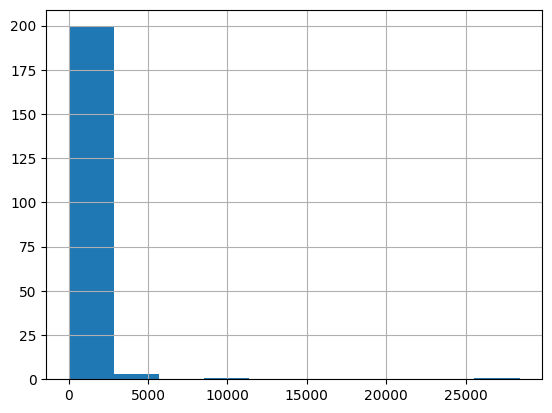

In [10]:
# Vẽ biểu đồ histogram


df1['cases'].hist()

In [11]:
import seaborn as sns

<Axes: xlabel='cases', ylabel='Count'>

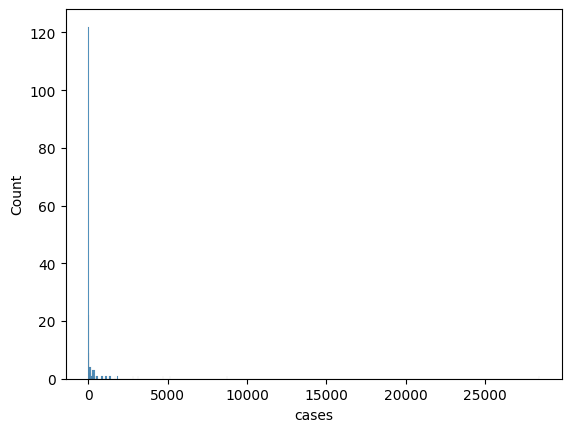

In [13]:
sns.histplot(df1['cases'])

### Thực hành Truy cập dữ liệu với loc và iloc

In [17]:
c = df1.iloc[200]
c

country            Vietnam
continent             Asia
date            2020-04-12
day                     12
month                    4
year                  2020
cases                    4
deaths                   0
country_code           VNM
population      95540395.0
Name: 202, dtype: object

In [18]:
x = df.iloc[[3,5,7]]
x

,country,continent,date,day,month,year,cases,deaths,country_code,population
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
5,Anguilla,America,2020-04-12,12,4,2020,0,0,NaN,NaN
7,Argentina,America,2020-04-12,12,4,2020,162,7,ARG,44494502.0


In [19]:
b = df.iloc[3:8]
b

,country,continent,date,day,month,year,cases,deaths,country_code,population
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0
5,Anguilla,America,2020-04-12,12,4,2020,0,0,NaN,NaN
6,Antigua_and_Barbuda,America,2020-04-12,12,4,2020,0,0,ATG,96286.0
7,Argentina,America,2020-04-12,12,4,2020,162,7,ARG,44494502.0


In [20]:
d = df.iloc[20:30, 2:6]
d

,date,day,month,year
20,2020-04-12,12,4,2020
21,2020-04-12,12,4,2020
22,2020-04-12,12,4,2020
23,2020-04-12,12,4,2020
24,2020-04-12,12,4,2020
25,2020-04-12,12,4,2020
26,2020-04-12,12,4,2020
27,2020-04-12,12,4,2020
28,2020-04-12,12,4,2020
29,2020-04-12,12,4,2020


In [21]:
df.iloc[30, 5]

2020

In [22]:
e = df.iloc[0: 10 : 2]
e

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0
6,Antigua_and_Barbuda,America,2020-04-12,12,4,2020,0,0,ATG,96286.0
8,Armenia,Europe,2020-04-12,12,4,2020,30,2,ARM,2951776.0


In [23]:
h = df.iloc[:, [1,3,5]]
h

,continent,day,year
0,Asia,12,2020
1,Europe,12,2020
2,Africa,12,2020
3,Europe,12,2020
4,Africa,12,2020
...,...,...,...
201,America,12,2020
202,Asia,12,2020
203,Asia,12,2020
204,Africa,12,2020


In [24]:
df.loc[1]

country            Albania
continent           Europe
date            2020-04-12
day                     12
month                    4
year                  2020
cases                   17
deaths                   0
country_code           ALB
population       2866376.0
Name: 1, dtype: object

#### Tổng số lượng người mắc bệnh của từng châu lục
#### Tổng số lượng ca tử vong của từng châu lục

In [14]:
df.groupby('continent')['cases'].sum()

continent
Africa       714
America    33519
Asia       12979
Europe     34141
Oceania       68
Other          0
Name: cases, dtype: int64

In [15]:
df.pivot_table(values='cases', index='continent', aggfunc='sum')

,cases
continent,
Africa,714
America,33519
Asia,12979
Europe,34141
Oceania,68
Other,0


In [16]:
df.groupby('continent')[['cases', 'deaths']].sum()

,cases,deaths
continent,,
Africa,714,52
America,33519,2111
Asia,12979,383
Europe,34141,3571
Oceania,68,4
Other,0,0


#### Top 5 quốc gia có số lượng ca mắc mới lớn nhất

#### Top 5 quốc gia có số lượng ca tử vong lớn nhất